# NumPy (cont'd)
# TensorFlow & Keras intro

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.r_[50, 10, 20, 30, 40]
np.sort(x) # returns a copy

array([10, 20, 30, 40, 50])

In [3]:
x

array([50, 10, 20, 30, 40])

In [4]:
x.sort()

In [5]:
x # in-place

array([10, 20, 30, 40, 50])

In [7]:
import scipy.stats
x = np.r_[50, 10, 20, 30, 40, 20, 20]
scipy.stats.rankdata(x)

array([ 7.,  1.,  3.,  5.,  6.,  3.,  3.])

# vector indexing + filtering + exercises

In [8]:
x = [1,2,3,4]

In [9]:
x[3] # result = scalar

4

In [11]:
x[::-1] # result = list

[4, 3, 2, 1]

In [12]:
x[3:]

[4]

In [13]:
x = np.r_[1,3,2,5,4]
x[3]

5

In [14]:
x[-1]

4

In [15]:
x[::-1]

array([4, 5, 2, 3, 1])

In [16]:
np.sort(x)[::-1]

array([5, 4, 3, 2, 1])

In [21]:
# 1. scalar-based indexing
# 2. slice-based
# 3. int vector-based
x[ [1, 2, 0, 1, 1, 1] ]

array([3, 2, 1, 3, 3, 3])

In [18]:
x[ [3] ]

array([5])

In [19]:
# 4. bool-array-based indexing
x[ np.r_[ True, False, False, True, True ] ]

array([1, 5, 4])

In [20]:
x

array([1, 3, 2, 5, 4])

In [22]:
x<3

array([ True, False,  True, False, False], dtype=bool)

In [23]:
x[ x<3 ]

array([1, 2])

In [24]:
x[ (x<3) | (x>4)]

array([1, 2, 5])

In [25]:
np.random.seed(123)
x = np.round(np.random.normal(size=20), 2)
x

array([-1.09,  1.  ,  0.28, -1.51, -0.58,  1.65, -2.43, -0.43,  1.27,
       -0.87, -0.68, -0.09,  1.49, -0.64, -0.44, -0.43,  2.21,  2.19,
        1.  ,  0.39])

* Print all values in $[-2,-1]\cup[1,2]$.

In [28]:
x[ ((x>=-2) & (x<=-1)) | ((x>=1) & (x<=2)) ]

array([-1.09,  1.  , -1.51,  1.65,  1.27,  1.49,  1.  ])

In [31]:
x[ (np.abs(x) <= 2) & (np.abs(x)>=1) ] # |x| € [1,2]

array([-1.09,  1.  , -1.51,  1.65,  1.27,  1.49,  1.  ])

* Print the number and the proportion of nonnegative elements in `x`.

In [34]:
len(x[x>=0])

9

In [38]:
len(x[x>=0])/len(x)

0.45

In [40]:
np.sum(x>=0)

9

In [41]:
np.mean(x>=0)

0.45000000000000001

* Compute the arithmetic mean of absolute values.

In [42]:
np.mean(np.abs(x))

1.0335000000000001

* Determine elements in `x` which are the least and the most distant from 0.

In [45]:
d = np.abs(x-0)
x[np.argmin(d)], x[np.argmax(d)]

(-0.089999999999999997, -2.4300000000000002)

In [46]:
x

array([-1.09,  1.  ,  0.28, -1.51, -0.58,  1.65, -2.43, -0.43,  1.27,
       -0.87, -0.68, -0.09,  1.49, -0.64, -0.44, -0.43,  2.21,  2.19,
        1.  ,  0.39])

* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.

In [63]:
d = np.abs(x-x.mean())
# np.argsort(d)[-3:] - indexes of the 3 greatest vals in d
x[ np.argsort(d)[-3:] ]



array([ 2.19,  2.21, -2.43])

In [64]:
np.argsort(d)[-3:]    

array([17, 16,  6])

In [53]:
np.sort(x)[-3::]

array([ 1.65,  2.19,  2.21])

In [65]:
y = np.r_[50, 20, 10, 30, 40]
#y[np.argsort(y)] # np.sort(y)
np.argsort(y)

array([2, 1, 3, 4, 0])

In [66]:
# np.argmin(x) == np.argsort(x)[0]
# np.argmax(x) == np.argsort(x)[-1]

* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.

In [67]:
q1, q3 = np.percentile(x, [25,75])
iqr = q3-q1
x[ (x >= q1-1.5*iqr) & (x <= q3+1.5*iqr) ]

array([-1.09,  1.  ,  0.28, -1.51, -0.58,  1.65, -2.43, -0.43,  1.27,
       -0.87, -0.68, -0.09,  1.49, -0.64, -0.44, -0.43,  2.21,  2.19,
        1.  ,  0.39])

* Print the fractional part of each number.

In [71]:
np.abs(x-np.trunc(x))

array([ 0.09,  0.  ,  0.28,  0.51,  0.58,  0.65,  0.43,  0.43,  0.27,
        0.87,  0.68,  0.09,  0.49,  0.64,  0.44,  0.43,  0.21,  0.19,
        0.  ,  0.39])

* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]>=0` and `"negative"` otherwise.

In [73]:
np.where(x>=0, 'nonnegative', 'negative')

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'negative', 'negative', 'nonnegative', 'negative',
       'negative', 'negative', 'nonnegative', 'negative', 'negative',
       'negative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative'], 
      dtype='<U11')

In [82]:
np.array(['negative', 'nonnegative'])[(x >= 0).astype(np.int)]

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'negative', 'negative', 'nonnegative', 'negative',
       'negative', 'negative', 'nonnegative', 'negative', 'negative',
       'negative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative'], 
      dtype='<U11')

In [81]:
(x >= 0).astype(np.int)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]<-1`, `"large"` if `x[i]>1` and `"medium"` otherwise.

In [74]:
np.where(x > 1, 'large',
        np.where(x < -1, 'small', 'medium'))

array(['small', 'medium', 'medium', 'small', 'medium', 'large', 'small',
       'medium', 'large', 'medium', 'medium', 'medium', 'large', 'medium',
       'medium', 'medium', 'large', 'large', 'medium', 'medium'], 
      dtype='<U6')

In [87]:
np.array(['s', 'm', 'l'])[(x>=-1).astype(np.int)+(x>1)]

array(['s', 'm', 'm', 's', 'm', 'l', 's', 'm', 'l', 'm', 'm', 'm', 'l',
       'm', 'm', 'm', 'l', 'l', 'm', 'm'], 
      dtype='<U1')

We have 4 vector indexing schemes:

1. scalar-based
2. slice
3. int-vector
4. bool-vector

**ONLY slice-based indexing returns a **view** on an existing array**

In [88]:
def f(x):
    x *= -1
    return x

In [91]:
x = np.r_[1,2,3,4,5]
f(x), x

(array([-1, -2, -3, -4, -5]), array([-1, -2, -3, -4, -5]))

In [92]:
x = np.r_[1,2,3,4,5]
f(x[ [2, 4] ]), x

(array([-3, -5]), array([1, 2, 3, 4, 5]))

In [93]:
x = np.r_[1,2,3,4,5]
f(x[ x > 3 ]), x

(array([-4, -5]), array([1, 2, 3, 4, 5]))

In [94]:
x = np.r_[1,2,3,4,5]
f(x[ ::2 ]), x

(array([-1, -3, -5]), array([-1,  2, -3,  4, -5]))

In [96]:
x = np.r_[1,2,3,4,5]
f(x[ ::2 ].copy()), x

(array([-1, -3, -5]), array([1, 2, 3, 4, 5]))

In [98]:
x = np.random.rand(10)

In [100]:
x.ctypes.data

59381248

In [106]:
x.strides

(8,)

In [110]:
y = x[::2]
y.ctypes.data, y.strides

(59381248, (16,))

In [111]:
y[1] = 8

In [112]:
x

array([ 0.43086276,  0.4936851 ,  8.        ,  0.31226122,  0.42635131,
        0.89338916,  0.94416002,  0.50183668,  0.62395295,  0.1156184 ])

# Matrix indexing

In [113]:
iris = np.array(sns.load_dataset("iris").iloc[:10,0:4])
iris

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [114]:
# x- vector
# x[index]

# A-matrix
# x[row_index, col_index]

|       | scalar | slice | int | bool |
|-------|--------|-------|-----|-------
|scalar |  scalar      | vector,view      |  vector   | vector     |
|slice  |    X   | subblock, view     |  subblock   | subblock     |
|int    |    X   | X     |  vectorized   |   vectorized   |
|bool   |    X   | X     | X   |    vectorized  |

In [116]:
iris[1, 1]

3.0

In [117]:
iris[1, ::2]

array([ 4.9,  1.4])

In [118]:
iris[1, [1,3]]

array([ 3. ,  0.2])

In [120]:
iris[1, np.mean(iris, axis=0) > 3]

array([ 4.9,  3. ])

In [121]:
iris[:4, ::2]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

In [122]:
iris[:4, [0, 2]]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

In [123]:
iris[:4, np.r_[True,False,True, False]]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

In [124]:
iris[ [1, 3, 5], [2, 1, 0] ]

array([ 1.4,  3.1,  5.4])

In [125]:
# iris[1, 2], iris[3, 1], iris[5, 0]

In [126]:
iris[ np.r_[1,3,5].reshape(-1,1), np.r_[2,1,0].reshape(1,-1)]

array([[ 1.4,  3. ,  4.9],
       [ 1.5,  3.1,  4.6],
       [ 1.7,  3.9,  5.4]])

In [127]:
iris[ np.r_[0,1,2,3].reshape(-1,1), np.r_[0,2].reshape(1,-1)]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

In [130]:
iris[ np.ix_( [0,1,2,3], [0,2] ) ]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

# MNIST database

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
np.unique(mnist.train.labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape

(55000,)

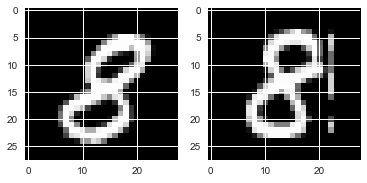

In [14]:
plt.subplot(1,2,1)
plt.imshow(mnist.train.images[5,:].reshape(28,28), cmap="gray")
plt.subplot(1,2,2)
plt.imshow(mnist.train.images[9,:].reshape(28,28), cmap="gray")
plt.show()

In [12]:
mnist.train.labels[ [5, 9] ]

array([8, 8], dtype=uint8)

In [27]:
Y_train = mnist.train.labels
Y_test  = mnist.test.labels

def one_hot_encode(t):
    R = np.zeros((len(t), np.max(t)+1))
    R[np.arange(len(t)), t] = 1.0
    return R

Let t be vector of $n$ integers in $\{0,…,k-1\}$.
Write a function to one-hot-encode each $t_i$.
Return a $0-1$ matrix $R$ of size 
$n\times k$ 
such that $r_{i,j}=1$ if and only if $t_i=j$.

In [28]:
Y_train2 = one_hot_encode(Y_train)
Y_test2  = one_hot_encode(Y_test)

In [29]:
Y_train[:5]

array([7, 3, 4, 6, 1], dtype=uint8)

In [30]:
def one_hot_decode(R):
    return np.argmax(R, axis=1)

In [31]:
np.all(one_hot_decode(one_hot_encode(Y_train)) == Y_train)

True

In [34]:
# compute the centroids (arithmetic means with respect to 784 individual pixels)
# of each class (based on mnist.train.images)
# and store the as 10x784 matrix
# draw them in a single plot

X_train = mnist.train.images
X_test  = mnist.test.images

M = np.empty( (10, 784) )
for i in range(10):
    # M[i,:]  - the centroid of digits == i
    M[i,:] = np.mean(X_train[ Y_train == i, :], axis=0)
    # the componentwise arithmetic mean of all the images == i

In [39]:
# the nearest centroid classifier:

# for each digit in mnist.test.images:
#    find the nearest centroid to a given digit
#    check if the guessed class is the same as the one indicated by mnist.test.labels

import scipy.spatial.distance
D = scipy.spatial.distance.cdist(X_test, M) # very memory inefficient, but fast :)
Y_pred = D.argmin(axis=1)

# X_test = 10000*784
# M      = 10 *784


# report the accuracy of the classifier
# == FRACTION(PERCENTAGE) of correctly classified digits
np.mean(Y_pred == Y_test)

0.82079999999999997

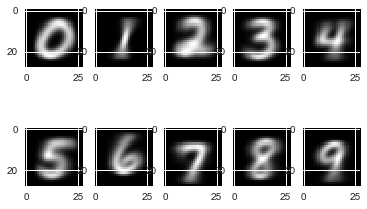

In [36]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(M[i,:].reshape(28,28), cmap='gray')
    
plt.show()

# Logistic regression (binary) in 2d

In [40]:
import pandas as pd
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
X = np.array(iris.iloc[:,2:4])
Y = np.array(iris.iloc[:,4] == "setosa", dtype='float')

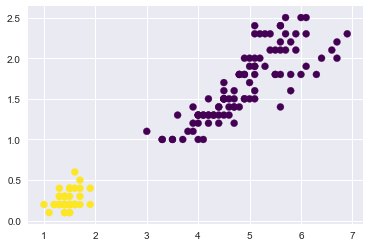

In [45]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis')

In [46]:
# F_(a,b,c)( (x1,x2) ) = P(Y=1 | (x1,x2))

def F(x12, abc):
    return 1/(1+np.exp(-(abc[0]+abc[1]*x12[0]+abc[2]*x12[1])))

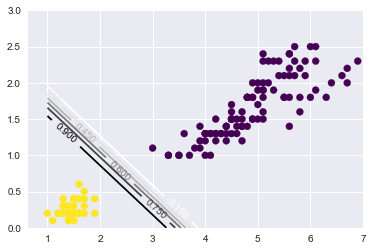

In [68]:
abc = np.r_[23.755,-6.605,-9.6837]
x1 = np.linspace(1, 7, 100)
x2 = np.linspace(0, 3, 100)
xx1, xx2 = np.meshgrid(x1, x2)
zz = 1 / (1.0+np.exp(-(abc[0]+abc[1]*xx1+abc[2]*xx2)))
CS = plt.contour(xx1, xx2, zz)
plt.clabel(CS, inline=1, cmap='viridis')
plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis')

In [67]:
import sklearn.linear_model
l = sklearn.linear_model.LogisticRegression(fit_intercept=True, C=100000)
l.fit(X, Y)
l.intercept_, l.coef_

(array([ 23.75517697]), array([[-6.60501948, -9.68370611]]))

# Multinomial logistic regression a.k.a. single layer nn

In [113]:
def softmax(y):
    "for each row in y, denoted as y_row, compute normalized(exp(y_row))"
    y = np.exp(y)
    return y / np.sum(y, axis=1).reshape(-1,1)

In [115]:
np.round(softmax(np.array(
    [
            [1, 50.03, 50],
                [1,2,3]
    ]
    )),3)

array([[ 0.   ,  0.507,  0.493],
       [ 0.09 ,  0.245,  0.665]])

In [116]:
np.random.seed(123)
X_train = np.insert(mnist.train.images, 0, 1.0, axis=1) # add a column of ones
X_test  = np.insert(mnist.test.images, 0, 1.0, axis=1)  # add a column of ones
W = np.random.normal(size=(785, 10))

In [117]:
X_test.shape

(10000, 785)

In [118]:
W.shape

(785, 10)

In [121]:
def one_hot_decode(R):
    return np.argmax(R, axis=1)

def nnet(X, W):
    return softmax(X.dot(W))

In [120]:
np.mean(one_hot_decode(nnet(X_test, W)) == Y_test)

0.088900000000000007